# Using color cycles

When the number of colors is unknown in advance, as when running a community discovery algorithm, color cycles are helpful.  

In [1]:
from cycler import cycler
# a cycler Is a container containing dictionaries, all with the sam ekeys
# So we can simultaneously cycle through colors and line styles
color_cycle = cycler(color=['r', 'g', 'b'],style=['plain','dashed','dotted'])

Ncolors = len(color_cycle)
print('Num colors',Ncolors)
#  We picked 3 color/line style to cylce through.
for v in color_cycle:
  print(v)

Num colors 3
{'color': 'r', 'style': 'plain'}
{'color': 'g', 'style': 'dashed'}
{'color': 'b', 'style': 'dotted'}


In [2]:
from cycler import cycler
color_cycle = cycler(color=['r', 'g', 'b'])
Ncolors = len(color_cycle)
# Turn it into an infinite iterator
cc = color_cycle()
# Show the cycler cycling
for (i,c) in zip(range(4*Ncolors),cc):
     if i%Ncolors == 0:
       print('='*14)
     print(c)

{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}


Color cycles are often used for configuring matplotlib.

Num colors 20
{'color': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353)}
{'color': (0.4196078431372549, 0.6823529411764706, 0.8392156862745098)}
{'color': (0.6196078431372549, 0.792156862745098, 0.8823529411764706)}


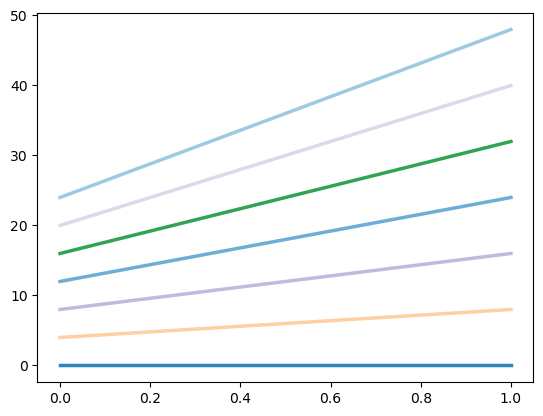

In [3]:
from matplotlib import pyplot as plt
Z = plt.cycler("color", plt.cm.tab20c.colors)
# When plotting cycle through this sequence
from matplotlib import rcParams
rcParams["axes.prop_cycle"] = Z
zz = Z()
# How many colors willI cycle through?
print('Num colors', len(Z))
for (i,c) in zip(range(3),zz):
     print(c)
fig, ax = plt.subplots()
# add 1 to the default
linewidth= 2.5
# Plot a line for every 4th color in cycle, go partway intio 2nd cycle
for i in range(25):
    if i%4 ==0:
      ax.plot([0,1], [i, 2*i],linewidth=linewidth)
    else:
      ax.plot([0],[0],linewidth)

#plt.show()

In [ ]:
def new_draw_networkx(g,fileName=None, cls_attr='Community', ax = None,
                   prog = 'neato', pos = None, color_seq = None,
                   val_seq = None,with_labels=False,show=False, title=None,
                   use_graphviz=False,figsize=(8,8),seed=None):
    """
    Draws graph uses nx drawing tools, which call matplotlib (pyplot) as plt.

    Use color_seq to specify colors used to represent membership in set
    of nodes bearing attribute C{cls_attr}.  By default this is C{Community},
    but it can be any node attribute  represented in C{node_dict}.

    Pass in C{color_seq} to use a particular set of node colors.
    Optionally use val_seq in conjunction to map particular colors to particular values.

    Can optionally pass in a previously computed node layout as C{pos}.  Useful
    for comparing versions of graph colored according to different
    attributes.
    """
    ## Get the range of the attribute function.
    #node_dict = dict(g.nodes(data=True))
    node_dict = g.nodes
    val_set = set([node_dict[n][cls_attr] for n in g.nodes()])
    if color_seq is None:
        # Use integers and default color map
        color_seq = list(range(len(val_set)))
    ## Assign a color index to each member of val_set
    if val_seq is None:
        val_seq = val_set
    else:
        assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
    color_dict = dict((v,color_seq[i]) for (i,v) in enumerate(val_seq))
    colorList = [color_dict[node_dict[n][cls_attr]] for n in g.nodes()]
    if ax is None:
        plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    if pos is None and use_graphviz:
        pos = nx.graphviz_layout(g,prog=prog)
        # The next two lines seem to be out of date, since they raise a "Requires pygraphviz" error
        #Gprime = nx.to_agraph(g)
        #Gprime.layout(prog=prog)
    elif pos is None:
        pos = nx.spring_layout(g,seed=seed)
    nx.draw(g,pos,ax = ax, node_color=colorList,with_labels=with_labels)
    if fileName is not None:
        plt.savefig(fileName)
    if show:
        plt.show()
    return color_dict, pos
